<a href="https://colab.research.google.com/github/saikrish1105/Heart-Disease-Detection/blob/main/HeartDieasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTS**

In [149]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# **Data Pre-Processing**

In [150]:
df = pd.read_csv("heart_disease_data.csv")
#1=> Yes Heart Disease & 0 => No Heart Disease
#Since the target was very straightforward with 1's and 0's split, I used sample to shuffle the values
df = df.sample(frac=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0


In [151]:
df.shape

(303, 14)

In [152]:
# Split the dataset into train, test and validation
train, valid, test = np.split(df,[int(0.65*len(df)),int(0.85*len(df))])  # 65% = Train Set - 20% = Validation Set - 15% = Test Set

In [153]:
def scale_df(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  X_scaled = scaler.fit_transform(X)

  ros = RandomOverSampler()
  X_scaled_sampled, Y_sampled = ros.fit_resample(X_scaled,Y)

  data = np.hstack((X_scaled,np.reshape(Y,(-1,1))))

  return data, X_scaled_sampled, Y_sampled

In [154]:
data, X,Y = scale_df(df)
train, X_train, Y_train = scale_df(train)
test, X_test, Y_test = scale_df(test)
valid, X_valid, Y_valid = scale_df(valid)

# **Importing A Suitable Model**

In [155]:
# Accuracy Finder
def compute_accuracy(Y_true, Y_pred):
    correctly_predicted = 0
    # iterating over every label and checking it with the true sample
    for true_label, predicted in zip(Y_true, Y_pred):
        if true_label == predicted:
            correctly_predicted += 1
    # computing the accuracy score
    accuracy_score = correctly_predicted / len(Y_true)
    return accuracy_score

#Accuracy Dictionary of All Models
accuracy = {}

##K Nearest Neighbour

In [156]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred_knn= knn.predict(X_test)

knn_accuracy = (round(compute_accuracy(Y_test, Y_pred_knn),4)*100)
accuracy['KNN'] = knn_accuracy

## Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
lr_accuracy = (round(compute_accuracy(Y_test, Y_pred_lr),4)*100)

accuracy['Logistic Regression'] = lr_accuracy

## Decision Tree Classifier

In [158]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",max_depth=2)
dtc.fit(X_train,Y_train)
Y_pred_dtc = dtc.predict(X_test)
dtc_accuracy = (round(compute_accuracy(Y_test, Y_pred_dtc),4)*100)

accuracy['Decision Tree Classifier'] = dtc_accuracy

## Random Forest Classifier

In [159]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred_rfc = rfc.predict(X_test)
rfc_accuracy = (round(compute_accuracy(Y_test, Y_pred_rfc),4)*100)

accuracy['Random Forest Classifier'] = rfc_accuracy

## Using A Neural Network

In [160]:
import tensorflow.keras as tf
model = tf.Sequential([
    tf.layers.Dense(128,activation='relu',input_shape=(13,)),tf.layers.BatchNormalization(),tf.layers.Dropout(0.2),
    tf.layers.Dense(64,activation='relu'),tf.layers.BatchNormalization(),tf.layers.Dropout(0.2),
    tf.layers.Dense(32,activation='relu'),tf.layers.BatchNormalization(),tf.layers.Dropout(0.2),
    tf.layers.Dense(16,activation='relu'),tf.layers.BatchNormalization(),tf.layers.Dropout(0.2),
    tf.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [161]:
history = model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_valid, Y_valid),verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 46ms/step - loss: 0.9145 - accuracy: 0.5092 - val_loss: 0.6850 - val_accuracy: 0.6364
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.7111 - accuracy: 0.6330 - val_loss: 0.6673 - val_accuracy: 0.6667
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6401 - accuracy: 0.6789 - val_loss: 0.6528 - val_accuracy: 0.6818
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5001 - accuracy: 0.7477 - val_loss: 0.6396 - val_accuracy: 0.6970
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.5781 - accuracy: 0.6972 - val_loss: 0.6291 - val_accuracy: 0.6818
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4598 - accuracy: 0.7798 - val_loss: 0.6203 - val_accuracy: 0.6667
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.4246 - accuracy: 0.8165 - val_loss: 0.6116 - val_accuracy: 0.6970
Epoch 8/100
7/7 [===

In [162]:
Y_pred_nn = (model.predict(X_test)>0.8).astype(int).reshape(-1)

nn_accuracy = (round(compute_accuracy(Y_test, Y_pred_nn),4)*100)

accuracy['Neural Network'] = nn_accuracy

2/2 [==============================] - 0s 6ms/step


In [163]:
print(accuracy)

{'KNN': 86.96000000000001, 'Logistic Regression': 84.78, 'Decision Tree Classifier': 73.91, 'Random Forest Classifier': 89.13, 'Neural Network': 82.61}


<ipython-input-164-c535a5d30d03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(accuracy.keys()),y=list(accuracy.values()),palette="deep")


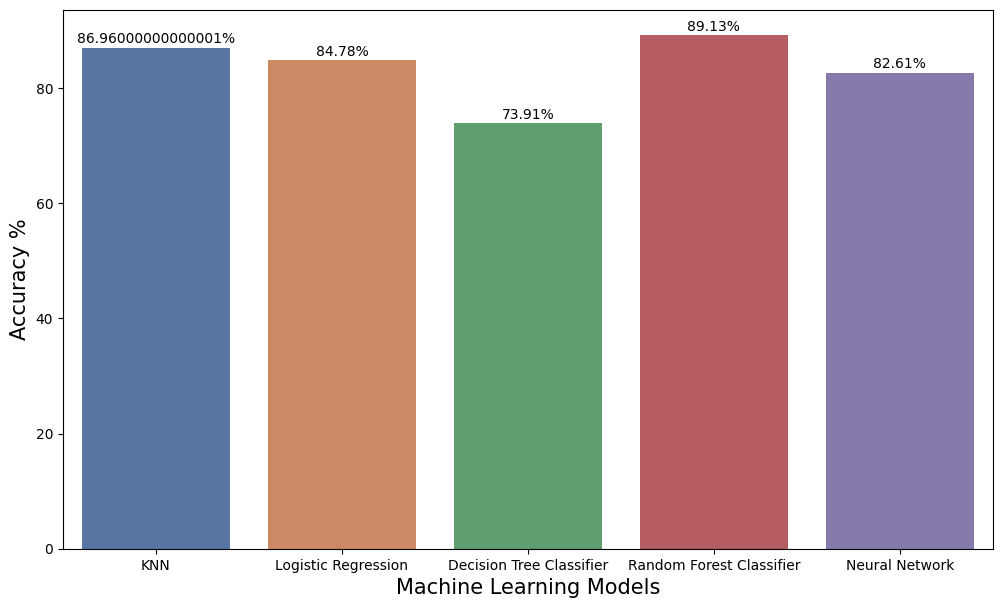

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
ax = sns.barplot(x=list(accuracy.keys()),y=list(accuracy.values()),palette="deep")
plt.xlabel("Machine Learning Models",fontsize=15)
plt.ylabel("Accuracy %",fontsize=15)
for p in ax.patches :
  width = p.get_width()
  height = p.get_height()
  x = p.get_x()
  y = p.get_y()
  ax.annotate(f"{height}%",(x+width/2,y+height*1.01),ha="center")
plt.show()